In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Tasbiha@1234",
                            database = "ecommerce")

cur = db.cursor()

# 1. List all unique cities where customers are located.

In [5]:
query = """
SELECT DISTINCT
    customer_city
FROM
    customers AS unique_citiesa;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


## **2. Count the number of orders placed in 2017.**

In [4]:
query = """
SELECT 
    count(order_id)
FROM
    orders
WHERE
    YEAR(order_purchase_timestamp) = '2017';
"""

cur.execute(query)
data = cur.fetchall()
"total order placed in year 2017 are: ", data[0][0]

('total order placed in year 2017 are: ', 45101)

# 3. Find the total sales per category.

In [9]:
query = """
SELECT 
    upper(products.product_category) AS 'category',
    ROUND(SUM(payments.payment_value), 2) AS 'sales'
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
        JOIN
    payments ON payments.order_id = order_items.order_id
GROUP BY category;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df.head()

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33


# 4. Calculate the percentage of orders that were paid in installments.

In [13]:
query = """
SELECT 
    (SUM(CASE
        WHEN payment_installments >= 1 THEN 1
        ELSE 0
    END)) / COUNT(*) * 100
FROM
    payments;
"""

cur.execute(query)
data = cur.fetchall()
"the percentage of orders that were paid in installments", data[0][0]

('the percentage of orders that were paid in installments', Decimal('99.9981'))

# 5. Count the number of customers from each state. 

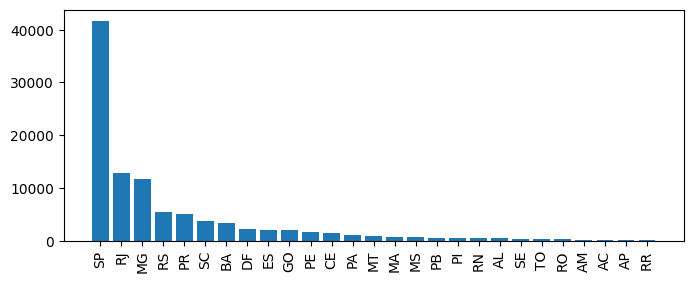

In [13]:
query = """
SELECT DISTINCT
    customer_state AS customer_state,
    COUNT(customer_id) AS Total_Customers
FROM
    customers
GROUP BY customer_state;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df = df.sort_values(by = "customer_count", ascending = False)

plt.figure(figsize = (8,3))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

# Intermediate Queries

# 1. Calculate the number of orders per month in 2018.

   month_no month_name  total_orders
0         1    January          7269
1         2   February          6728
2         3      March          7211
3         4      April          6939
4         5        May          6873
5         6       June          6167
6         7       July          6292
7         8     August          6512
8         9  September            16
9        10    October             4


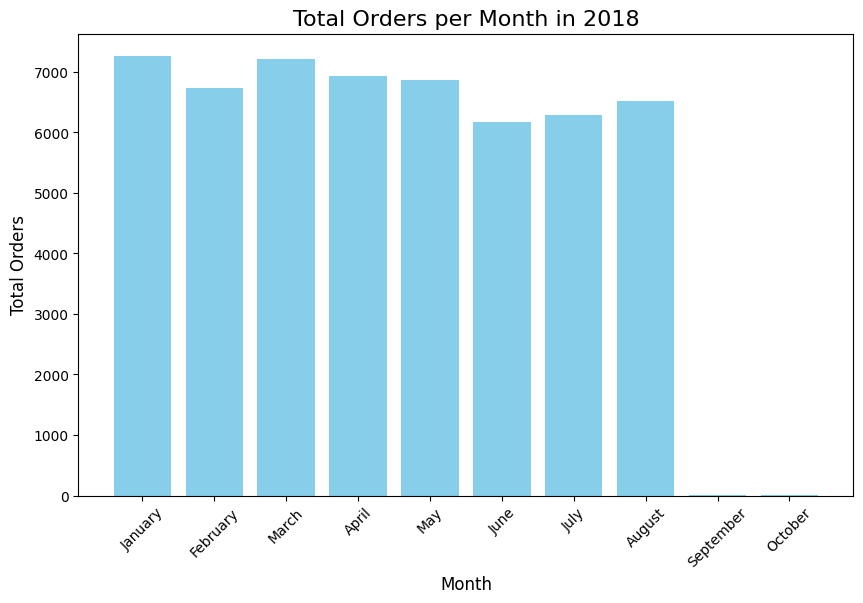

In [18]:
query = """
SELECT 
    MONTH(order_purchase_timestamp) AS month_no,
    MONTHNAME(order_purchase_timestamp) AS month_name,
    COUNT(order_id) AS total_orders
FROM ecommerce.orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY month_name, month_no
ORDER BY month_no ASC;
"""

cur.execute(query)
data = cur.fetchall()

# Create DataFrame once
df = pd.DataFrame(data, columns=['month_no', 'month_name', 'total_orders'])
print(df)

# Ensure sorted by month number
df = df.sort_values('month_no')

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(df['month_name'], df['total_orders'], color='skyblue')

plt.title("Total Orders per Month in 2018", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=45)
plt.show()
